In [1]:
#import base libraries
import pandas as pd
import numpy as np
import copy

#Statistics and Plotting Libraries
from scipy import stats
import statsmodels.api as sm 
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns

#misc
import warnings
warnings.filterwarnings('ignore')

# EDA Notebook - With Location Accuracy Target

Note that not all results are seen on this document. But some plots and the code can be seen

In [ ]:
# Import Dataset
data = pd.read_csv('CSVs/Location_Accuracy/locationaccuracy_eda.csv')

#check shape
print(data.shape)

#print table
data.head(5)

In [ ]:
#Check columns
data.columns

## Datetime

In [4]:
#Copy and turn date into datetime
df = copy.deepcopy(data)
df.Date = pd.to_datetime(df.Date)

In [5]:
#Group by date by count and select one varibale
groupdate = df.groupby(pd.Grouper(key = 'Date'), axis = 0).count()
variable = groupdate['Month']

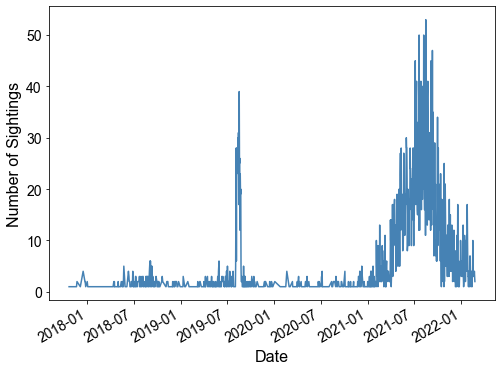

In [6]:
#plot number of sightings per day
fig = plt.figure(figsize=[8,6])
variable.plot(color = 'steelblue')
sns.set_theme(style="white")
plt.xlabel('Date', size = 16)
plt.ylabel('Number of Sightings', size = 16)
plt.tick_params(labelsize=14)
plt.show()

#save
fig.savefig('Plots/Location_Accuracy/SightingsOverTime.png')

Sightings data supplied by the B.C. Cetacean Sightings Network. Sightings are opportunistic and not corrected for effort. 

## Correlations and Basic Skewness Check

In [7]:
#Load Ordinal Plot
ordinal = pd.read_csv('CSVs/Location_Accuracy/ordinal_locationaccuracy.csv')

In [ ]:
#Let us see a quick heat correlation map, with standardized values with ordinal plot

#Deepcopy
animal_df = copy.deepcopy(ordinal.drop(['SpeciesName', 'Date', 'Time', 'SeaState', 'WindSpeed', 'YearStr',
                        'Fluking', 'Depredation', 'Porpoising', 'Spy-hopping',
                        'Bow-riding', 'Fast moving', 'Breaching', 'Slow moving', 'Feeding'], axis= 1))

#Apply correlation
matrix_corr = animal_df.corr()

#Create plot, applying mask (cut in half)
plt.figure(figsize=[16,12])
mask = np.triu(np.ones_like(matrix_corr, dtype=bool))
sns.heatmap(matrix_corr, annot=True, mask = mask)
plt.show()

In [ ]:
#Check distribution skewness

#exctract column values, identify number of columns and rows
l = animal_df.columns.values 
number_of_columns=10
number_of_rows = len(l)-1/number_of_columns

#plot figure for each column
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(animal_df[l[i]],kde=True) 

## Numerical Columns

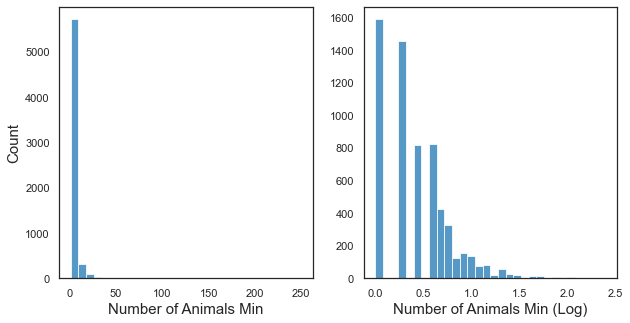

In [11]:
#plot max animal Log
fig, axes = plt.subplots(1,2, figsize = (10,5))
sns.histplot(data = data, x = 'Number of Animals Min', bins = 30, color = 'tab:blue', ax = axes[0])
sns.histplot(data = data, x = np.log10(data['Number of Animals Min']), bins = 30, color = 'tab:blue', ax = axes[1])
sns.set_theme(style="white")
axes[0].set_xlabel('Number of Animals Min', size = 15)
axes[1].set_xlabel('Number of Animals Min (Log)', size = 15)
axes[0].set_ylabel('Count', size = 15)
axes[1].set_ylabel(None)
plt.show()

Sightings data supplied by the B.C. Cetacean Sightings Network. Sightings are opportunistic and not corrected for effort. 

In [ ]:
#plot min animal Log
fig, axes = plt.subplots(1,2, figsize = (10,5))
sns.histplot(data = data, x = 'MinAnimal', bins = 30, color = 'tab:blue', ax = axes[0])
sns.histplot(data = data, x = np.log10(data['MinAnimal']), bins = 30, color = 'tab:blue', ax = axes[1])
sns.set_theme(style="white")
axes[0].set_xlabel('Min Number of Animals', size = 15)
axes[1].set_xlabel('Min Number of Animals (Log)', size = 15)
axes[0].set_ylabel('Count', size = 15)
axes[1].set_ylabel(None)
plt.show()

In [ ]:
#plot max animal Log
fig, axes = plt.subplots(1,2, figsize = (10,5))
sns.histplot(data = data, x = 'MaxAnimal', bins = 30, color = 'tab:blue', ax = axes[0])
sns.histplot(data = data, x = np.log10(data['MaxAnimal']), bins = 30, color = 'tab:blue', ax = axes[1])
sns.set_theme(style="white")
axes[0].set_xlabel('Max Number of Animals', size = 15)
axes[1].set_xlabel('Max Number of Animals (Log)', size = 15)
axes[0].set_ylabel('Count', size = 15)
axes[1].set_ylabel(None)
plt.show()

#save
fig.savefig('Plots/Location_Accuracy/Feature_MaxAnimal.png')

In [ ]:
#plot histograph number of animals per day
plt.figure()
sns.histplot(data = data, x = 'Day')

In [ ]:
#plot histogram for number of sightings per weekday
plt.figure()
sns.histplot(data = data, x = 'WeekDay')

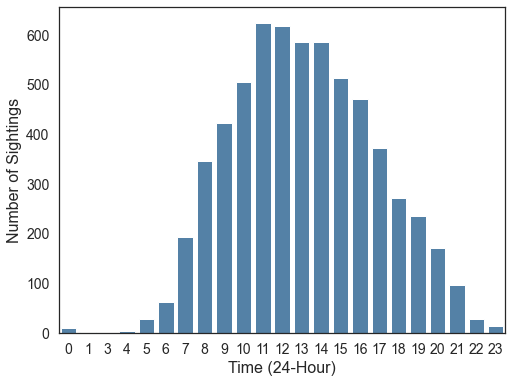

In [16]:
#plot number of sightings over hour
fig = plt.figure(figsize=[8,6])
sns.countplot(data = data, x = 'Hour', color = 'steelblue')
sns.set_theme(style="white")
plt.xlabel('Time (24-Hour)', size = 16)
plt.ylabel('Number of Sightings', size = 16)
plt.tick_params(labelsize=14)
plt.show()

#save
fig.savefig('Plots/Location_Accuracy/SightingsOverHour.png')

Sightings data supplied by the B.C. Cetacean Sightings Network. Sightings are opportunistic and not corrected for effort. 

In [ ]:
#plot lat and long
plt.figure(figsize=(8,6))
plt.scatter(data.LatitudeDD, data.LongitudeDD)
plt.show()

In [ ]:
#Remove Outlier
data = data.drop(data[(data['LongitudeDD'] < -140) & (data['LatitudeDD'] > 50)].index)

#plot lat and long
plt.figure(figsize=(8,6))
plt.scatter(data.LatitudeDD, data.LongitudeDD)
plt.show()

## Categorical Columns

In [20]:
#Define categorical columns
cat_col = data[['SpeciesCategory', 'IdConfidence', 'AnimalCountMeasure', 'Source', 
            'Direction of Travel', 'SightingPlatform', 'DistressedState', 'Experience', 
            'WhyInWater', 'Season', 'WeekDay', 'Month', 'WindCategory', 'SeaCategory', 
            'TimeOfDay', 'TimeOfDay_2','Location Accuracy']]

In [ ]:
#view count plots of categorical data

for col in cat_col:
    plt.figure()
    sns.set_theme(style = 'darkgrid')
    sns.countplot(data = cat_col, x = cat_col[col])
    plt.xticks(rotation=30)

### Plots for better comparisons

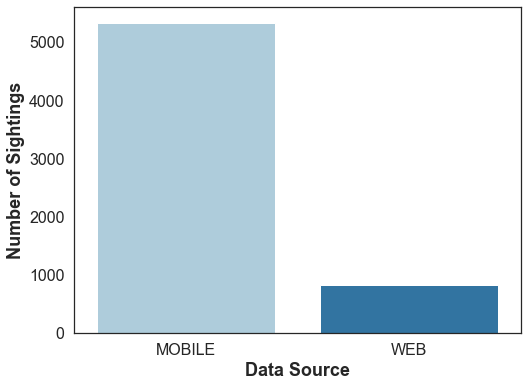

In [24]:
#plot number of sightings per source
fig = plt.figure(figsize=[8,6])
sns.set_palette("Paired")
sns.countplot(data = data, x = 'Source')
sns.set_theme(style="white")
plt.xlabel('Data Source', size = 18, weight='bold')
plt.ylabel('Number of Sightings', size = 18, weight = 'bold')
plt.tick_params(labelsize=16)
plt.show()

#save
fig.savefig('Plots/Location_Accuracy/Source.png')

Sightings data supplied by the B.C. Cetacean Sightings Network. Sightings are opportunistic and not corrected for effort. 

In [ ]:
#plot number of sightings per time of day
labels=['0-3','3-6','6-9','9-12','12-15','15-18','18-21','21-24']
fig = plt.figure(figsize=[8,6])
sns.set_theme(style="white")
data.TimeOfDay_2.value_counts().loc[labels].plot.bar(color='steelblue')
plt.xlabel('Time of Day (24-Hour)', size = 18, weight='bold')
plt.ylabel('Number of Sightings', size = 18, weight='bold')
plt.tick_params(labelsize=16, rotation = 0)
plt.show()

#save
fig.savefig('Plots/Location_Accuracy/TimeOfDay.png')

In [ ]:
#plot number of sightings experience
labels=['Ecotourism professional', 'Other marine professional', 'Researcher', 'Novice recreational observer',
        'Experienced recreational observer','Lightstation keeper']
fig = plt.figure(figsize=[8,6])
sns.set_theme(style="white")
data.Experience.value_counts().loc[labels].plot.bar(color='lightblue')
plt.xlabel('Experience', size = 16)
plt.ylabel('Number of Sightings', size = 16)
plt.tick_params(labelsize=14)
plt.xticks(rotation = 90)
plt.show()

# #save
fig.savefig('Plots/Location_Accuracy/Experience.png')

In [ ]:
#plot number of sightings per whyinwater
fig = plt.figure(figsize=[8,6])
sns.set_theme(style="white")
sns.set_palette("Paired")
sns.countplot(data = data, x = 'WhyInWater')
plt.xlabel('Experience', size = 18, weight='bold')
plt.ylabel('Number of Sightings', size = 18, weight = 'bold')
plt.tick_params(labelsize=16)
plt.show()

#save
fig.savefig('Plots/Location_Accuracy/WhyInWater.png')

In [ ]:
#plot number of sightings per sighting Platform
fig = plt.figure(figsize=[8,6])
sns.set_theme(style="white")
sns.countplot(data = data, x = 'SightingPlatform', color='steelblue')
plt.xlabel('Time of Day', size = 16)
plt.ylabel('Number of Sightings', size = 16)
plt.tick_params(labelsize=14)
plt.xticks(rotation = 90)
plt.show()

#save
fig.savefig('Plots/Location_Accuracy/sightingplatform.png')

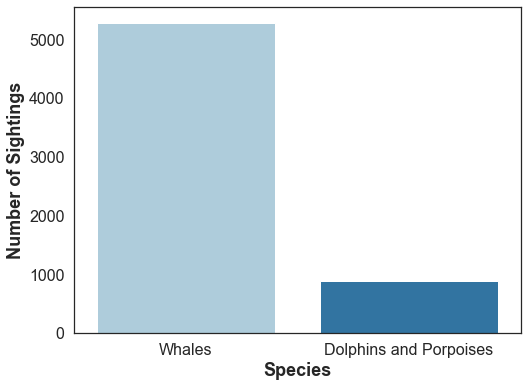

In [23]:
#plot number of sightings per speciescategory
fig = plt.figure(figsize=[8,6])
sns.set_palette("Paired")
sns.countplot(data = data, x = 'SpeciesCategory')
sns.set_theme(style="white")
plt.xlabel('Species', size = 18, weight='bold')
plt.ylabel('Number of Sightings', size = 18, weight = 'bold')
plt.tick_params(labelsize=16)
plt.show()

#save
fig.savefig('Plots/Location_Accuracy/Species.png')

Sightings data supplied by the B.C. Cetacean Sightings Network. Sightings are opportunistic and not corrected for effort. 

In [ ]:
#Calculating the percentage of location accuracy by each experience
experience = ['Ecotourism professional', 'Researcher', 'Other marine professional',
             'Experienced recreational observer', 'Novice recreational observer',
            'Lightstation keeper']
loca_acc = ['< 500m', '500m-2km', '> 2km']
subtotal_exp = data.groupby('Experience')['Location Accuracy'].agg('count').sort_values(ascending=False) #total of each boro count
fig = plt.figure(figsize=[12,8])
ax = sns.countplot(x="Experience", hue="Location Accuracy", 
                   data=data[['Experience', 'Location Accuracy']], 
                   order = subtotal_exp.index,
                  palette = "mako")
ax.set_xlabel('Observer Experience', fontsize = 14)
ax.set_ylabel('Number of Sightings', fontsize = 14)
ax.set_title('Percentage of Location Accuracy', fontsize = 16, weight = 'bold')
ax.set_xticklabels(['Ecotourism', 'Novice Rec.', 'Experienced Rec.', "Marine Professional", "Researcher", 'Lighthouse Keeper'])
ax.legend(labels=loca_acc, loc = 'upper right', title = 'Location Accuracy', fontsize=12, title_fontsize = 14)

#calculate percentage to anntotate
loca_num = [val for val in range(0, 6)]*2 
for p, i in zip(ax.patches, loca_num):
    percent = p.get_height()/subtotal_exp[i]
    ax.annotate('{:.1f}%'. format(percent*100), (p.get_x()+0.138, p.get_height()+25), 
                ha='center', size=12)

#save plt    
fig = ax.get_figure()
fig.savefig('Plots/Location_Accuracy/location_exp_percentage.png')

In [ ]:
#Calculating the percentage of IdConfidence by each experience
experience = ['Ecotourism professional', 'Researcher', 'Other marine professional',
             'Experienced recreational observer', 'Novice recreational observer',
            'Lightstation keeper']
confidence = ['Certain', 'Probable', 'Possible', 'Uncertain']
subtotal_exp = data.groupby('Experience')['IdConfidence'].agg('count').sort_values(ascending=False) #total of each boro count
fig = plt.figure(figsize=[12,8])
ax = sns.countplot(x="Experience", hue="IdConfidence", 
                   data=data[['Experience', 'IdConfidence']], 
                   order = subtotal_exp.index,
                  palette = "mako")
ax.set_xlabel('Observer Experience', fontsize = 14)
ax.set_ylabel('Number of Sightings', fontsize = 14)
ax.set_title('Percentage of ID Confidence', fontsize = 16, weight = 'bold')
ax.set_xticklabels(['Ecotourism', 'Novice Rec.', 'Experienced Rec.', "Marine Professional", "Researcher", 'Lighthouse Keeper'])
ax.legend(labels=confidence, loc = 'upper right', title = 'Id Confidence', fontsize=12, title_fontsize = 14)

#calculate percentage to anntotate
loca_num = [val for val in range(0, 6)]*3 
for p, i in zip(ax.patches, loca_num):
    percent = p.get_height()/subtotal_exp[i]
    ax.annotate('{:.1f}%'. format(percent*100), (p.get_x()+0.138, p.get_height()+28), 
                ha='center', size=12, rotation = 20)

# #save plt    
fig = ax.get_figure()
fig.savefig('Plots/Location_Accuracy/confidence_exp_percentage.png')

In [ ]:
#Calculating the percentage of location accuracy by each id confidence
confidence = ['Certain', 'Probable', 'Possible', 'Uncertain']
loca_acc = ['< 500m', '500m-2km', '> 2km']
subtotal_exp = data.groupby('IdConfidence')['Location Accuracy'].agg('count').sort_values(ascending=False) #total of each boro count
fig = plt.figure(figsize=[12,8])
ax = sns.countplot(x="IdConfidence", hue="Location Accuracy", 
                   data=data[['IdConfidence', 'Location Accuracy']], 
                   order = subtotal_exp.index,
                  palette = "mako")
ax.set_xlabel('Observer Id Confidence', fontsize = 14)
ax.set_ylabel('Number of Sightings', fontsize = 14)
ax.set_title('Percentage of Location Accuracy based on Id Confidence', fontsize = 16, weight = 'bold')
ax.legend(labels=loca_acc, loc = 'upper right', title = 'Location Accuracy', fontsize=12, title_fontsize = 14)

#calculate percentage to anntotate
loca_num = [val for val in range(0, 4)]*2 
for p, i in zip(ax.patches, loca_num):
    percent = p.get_height()/subtotal_exp[i]
    ax.annotate('{:.1f}%'. format(percent*100), (p.get_x()+0.138, p.get_height()+25), 
                ha='center', size=12)

#save plt    
fig = ax.get_figure()
fig.savefig('Plots/Location_Accuracy/location_confidence_percentage.png')

In [ ]:
#Calculating the percentage of location accuracy by species category
loca_acc = ['< 500m', '500m-2km', '> 2km']
subtotal_exp = data.groupby('SpeciesCategory')['Location Accuracy'].agg('count').sort_values(ascending=False) #total of each boro count
fig = plt.figure(figsize=[10,8])
ax = sns.countplot(x="SpeciesCategory", hue="Location Accuracy", 
                   data=data[['SpeciesCategory', 'Location Accuracy']], 
                   order = subtotal_exp.index,
                  palette = "mako")
ax.set_xlabel('Species Category', fontsize = 18, weight ='bold')
ax.set_ylabel('Number of Sightings', fontsize = 18, weight = 'bold')
ax.tick_params(labelsize=16)
#ax.set_title('Percentage of Location Accuracy based on Species', fontsize = 16, weight = 'bold')
ax.legend(labels=loca_acc, loc = 'upper right', title = 'Location Accuracy', fontsize=14, title_fontsize = 16)

#calculate percentage to anntotate
loca_num = [val for val in range(0,2)]*3 
for p, i in zip(ax.patches, loca_num):
    percent = p.get_height()/subtotal_exp[i]
    ax.annotate('{:.1f}%'. format(percent*100), (p.get_x()+0.138, p.get_height()+25), 
                ha='center', size=14, weight='bold')

# #save plt    
fig = ax.get_figure()
fig.savefig('Plots/Location_Accuracy/location_species_percentage.png')

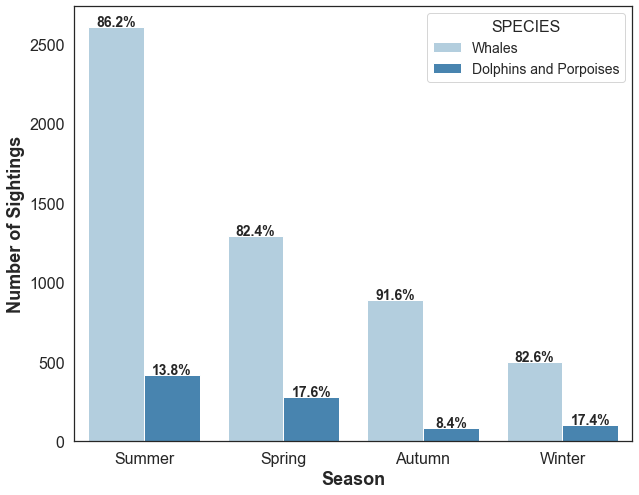

In [19]:
#Calculating the percentage of species category based on season
species = ['Whales', 'Dolphins and Porpoises']
subtotal_exp = data.groupby('Season')['SpeciesCategory'].agg('count').sort_values(ascending=False) #total of each boro count
fig = plt.figure(figsize=[10,8])
ax = sns.countplot(x="Season", hue="SpeciesCategory", 
                   data=data[['Season', 'SpeciesCategory']], 
                   order = subtotal_exp.index,
                  palette = "Blues")
ax.set_xlabel('Season', fontsize = 18, weight = 'bold')
ax.set_ylabel('Number of Sightings', fontsize = 18, weight = 'bold')
#ax.set_title('Percentage of Species based on Season', fontsize = 16, weight = 'bold')
ax.tick_params(labelsize=16)
ax.legend(labels=species, loc = 'upper right', title = 'SPECIES', fontsize=14, title_fontsize = 16)

#calculate percentage to anntotate
loca_num = [val for val in range(0,4)]*2 
for p, i in zip(ax.patches, loca_num):
    percent = p.get_height()/subtotal_exp[i]
    ax.annotate('{:.1f}%'. format(percent*100), (p.get_x()+0.2, p.get_height()+30), 
                ha='center', va = 'center', size=14, weight = 'bold')

# #save plt    
fig = ax.get_figure()
fig.savefig('Plots/Location_Accuracy/season_species_percentage.png')

Sightings data supplied by the B.C. Cetacean Sightings Network. Sightings are opportunistic and not corrected for effort. 

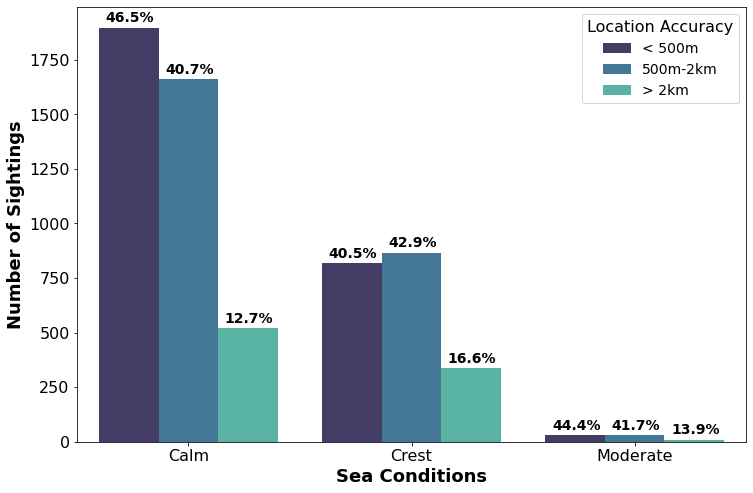

In [3]:
#Calculating the percentage of location accuracy by sea category
loca_acc = ['< 500m', '500m-2km', '> 2km']
subtotal_exp = data.groupby('SeaCategory')['Location Accuracy'].agg('count').sort_values(ascending=False) #total of each boro count
fig = plt.figure(figsize=[12,8])
ax = sns.countplot(x="SeaCategory", hue="Location Accuracy", 
                   data=data[['SeaCategory', 'Location Accuracy']], 
                   order = subtotal_exp.index,
                  palette = "mako")
ax.set_xlabel('Sea Conditions', fontsize = 18, weight ='bold')
ax.set_ylabel('Number of Sightings', fontsize = 18, weight ='bold')
# ax.set_title('Percentage of Location Accuracy based on Sea Conditions', fontsize = 16, weight = 'bold')
ax.legend(labels=loca_acc, loc = 'upper right', title = 'Location Accuracy', fontsize=14, title_fontsize = 16)
ax.tick_params(labelsize=16)

#calculate percentage to anntotate
loca_num = [val for val in range(0,3)]*3 
for p, i in zip(ax.patches, loca_num):
    percent = p.get_height()/subtotal_exp[i]
    ax.annotate('{:.1f}%'. format(percent*100), (p.get_x()+0.138, p.get_height()+25), 
                ha='center', size=14, weight='bold')

# #save plt    
fig = ax.get_figure()
fig.savefig('Plots/Location_Accuracy/location_seaconditions_percentage.png')

Sightings data supplied by the B.C. Cetacean Sightings Network. Sightings are opportunistic and not corrected for effort. 

In [ ]:
#Calculating the percentage of location accuracu by sea category (try 2, different orientation)
loca_acc = loca_acc = ['< 500m', '500m-2km', '> 2km']
subtotal_exp = data.groupby('Location Accuracy')['SeaCategory'].agg('count').reindex(loca_acc)
fig = plt.figure(figsize=[10,8])
ax = sns.countplot(x="Location Accuracy", hue="SeaCategory", 
                   data=data[['Location Accuracy', 'SeaCategory']], 
                   order = subtotal_exp.index,
                  palette = "mako")
ax.set_xlabel('Location Accuracy', fontsize = 18, weight = 'bold')
ax.set_ylabel('Number of Sightings', fontsize = 18, weight = 'bold')
#ax.set_title('Percentage of Location Accuracy based on Sea Conditions', fontsize = 16, weight = 'bold')
ax.tick_params(labelsize=16)
ax.legend(loc = 'upper right', title = 'Sea Conditions', fontsize=14, title_fontsize = 16)

#calculate percentage to anntotate
loca_num = [val for val in range(0,3)]*3
for p, i in zip(ax.patches, loca_num):
    percent = p.get_height()/subtotal_exp[i]
    ax.annotate('{:.1f}%'. format(percent*100), (p.get_x()+0.13, p.get_height()+40), 
                ha='center', va = 'center', size=14, weight = 'bold')

#save plt    
fig = ax.get_figure()
fig.savefig('Plots/Location_Accuracy/location_seaconditions_percentage2.png')

In [ ]:
#Calculating the percentage of location accuracy by wind category
loca_acc = loca_acc = ['< 500m', '500m-2km', '> 2km']
subtotal_exp = data.groupby('Location Accuracy')['WindCategory'].agg('count').reindex(loca_acc)
fig = plt.figure(figsize=[10,8])
ax = sns.countplot(x="Location Accuracy", hue="WindCategory", 
                   data=data[['Location Accuracy', 'WindCategory']], 
                   order = subtotal_exp.index,
                  palette = "mako")
ax.set_xlabel('Location Accuracy', fontsize = 18, weight = 'bold')
ax.set_ylabel('Number of Sightings', fontsize = 18, weight = 'bold')
#ax.set_title('Percentage of Location Accuracy based on Wind Conditions', fontsize = 16, weight = 'bold')
ax.tick_params(labelsize=16)
ax.legend(loc = 'upper right', title = 'Wind Conditions', fontsize=14, title_fontsize = 16)

#calculate percentage to anntotate
loca_num = [val for val in range(0,3)]*3
for p, i in zip(ax.patches, loca_num):
    percent = p.get_height()/subtotal_exp[i]
    ax.annotate('{:.1f}%'. format(percent*100), (p.get_x()+0.13, p.get_height()+40), 
                ha='center', va = 'center', size=14, weight = 'bold')

# save plt    
fig = ax.get_figure()
fig.savefig('Plots/Location_Accuracy/location_windconditions_percentage.png')

## Statistics

### Basic comparisons with numerical features

Code is shown, had to remove results for privacy.

In [ ]:
#Paired ttest with number of animals min and hour
stats.ttest_rel(data.Hour, data['Number of Animals Min'])

In [ ]:
#Paired ttest with MaxAnimal and hour
stats.ttest_rel(data.Hour, data['MaxAnimal'])

In [ ]:
#Paired ttest with number of animals min and day
stats.ttest_rel(data.Day, data['MinAnimal'])

In [ ]:
#Paired ttest with number of animals min and weekday
stats.ttest_rel(data.WeekDay, data['MinAnimal'])

In [ ]:
#Paired ttest with number of animals min and month
stats.ttest_rel(data.Month, data['Number of Animals Min'])

In [ ]:
#Paired ttest with number of animals min and month
stats.ttest_rel(data.Month, data['MaxAnimal'])

In [ ]:
#Correlation between latitude and number animals min
data.LatitudeDD.corr(data['Number of Animals Min'])

In [ ]:
#Correlation between Longitude and number animals min
data.LongitudeDD.corr(data['Number of Animals Min'])

In [ ]:
#Correlation between latitude and hour
data.LatitudeDD.corr(data.Hour)

In [ ]:
#Correlation between longitude and hour
data.LongitudeDD.corr(data.Hour)

In [ ]:
#Correlation between latitude and year
data.LatitudeDD.corr(data.Year)

In [ ]:
#Correlation between longitude and Year
data.LongitudeDD.corr(data.Year)

### Statistics with Categorical features

Will be doing Chi-Square tests and ANOVAs (with some numerical features).

Note: Not all cell outputs are shown.

In [44]:
#define function to find if p exported from stats.chi_contency is significant

def chi_significant(p):
    """
    Function to test if the p value is significant based on the Chi2 Contingency test
    """
    prob = 0.95 #confidence level
    alpha = 1.0 - prob
    print('significance=%.3f, p=%.3f' % (alpha, p))
    
    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')

In [45]:
#first tabulate a 2 way table with variables of Location Accuracy and Why In Water
two_way_table = pd.crosstab(index=data["Location Accuracy"], columns=data["WhyInWater"])

#Calculate the chi-square test
result_chi = stats.chi2_contingency(observed = two_way_table)
chi2, p, dof, expected = stats.chi2_contingency(observed = two_way_table)

#Print Results
print('chi-square statistic :', result_chi[0])
print('p-value :', result_chi[1])
print('degrees of freedom :', result_chi[2])
#print('expected counts : \n', result_chi[3])
print("Chi Significance:", chi_significant(p))

#Print Table
table = sm.stats.Table(two_way_table)
table.standardized_resids


chi-square statistic : 13.657042296787573
p-value : 0.0010824577288689407
degrees of freedom : 2
significance=0.050, p=0.001
Dependent (reject H0)
Chi Significance: None


WhyInWater,Professional,Recreational
Location Accuracy,,
500m-2km,-2.339481,2.339481
< 500m,-0.115882,0.115882
> 2km,3.485352,-3.485352


We can see that there is a significant relationship between Sighting Distance and Why in Water.

        Professionals were more likely to identify a animal > 2km.
        While recreational individuals are more likely to idenitfy animals < 2km.

In [ ]:
#first tabulate a 2 way table with variables of Location Accuracy and Experience
two_way_table = pd.crosstab(index=data["Location Accuracy"], columns=data["Experience"])

#Calculate the chi-square test
result_chi = stats.chi2_contingency(observed = two_way_table)
chi2, p, dof, expected = stats.chi2_contingency(observed = two_way_table)

#Print Results
print('chi-square statistic :', result_chi[0])
print('p-value :', result_chi[1])
print('degrees of freedom :', result_chi[2])
#print('expected counts : \n', result_chi[3])
chi_significant(p)

#Print Table
table = sm.stats.Table(two_way_table)
table.standardized_resids

We can see that there is a significant relationship between Sighting Distance and Experience.

        Ecotourism professionals were significantly more likely to identify animals > 2 km away.
        Researchers were signifcantly more likely to idenitfy animals 500 m - 2km and > 2 km away.
        Other Marine professionals were significantly more likely to identify animals < 2 km away
        Experienced Recreationalists were significantly likely to identify animals 500 m - 2km away.
        Novice Recreationalists were significantly more likely to idenitfy animals < 500 m away.
        LightHouse Keepers were significantly more likely to identify animals < 500 m away.


In [ ]:
#One Way Anova with Location Accuracy, Experience and WhyinWater
stats.f_oneway(ordinal['Location Accuracy'], ordinal['Experience'])

In [ ]:
#first tabulate a 2 way table with variables of IdConfidence and Experience
two_way_table = pd.crosstab(index=data["IdConfidence"], columns=data["Experience"])

#Calculate the chi-square test
result_chi = stats.chi2_contingency(observed = two_way_table)
chi2, p, dof, expected = stats.chi2_contingency(observed = two_way_table)

#Print Results
print('chi-square statistic :', result_chi[0])
print('p-value :', result_chi[1])
print('degrees of freedom :', result_chi[2])
#print('expected counts : \n', result_chi[3])
chi_significant(p)

#Print Table
table = sm.stats.Table(two_way_table)
table.standardized_resids

We can see that there is a significant relationship between IdConfidence and Experience.

        Ecotourism professionals were significantly more likely to be Certain in their id confidence
        Researchers were significantly more likely to be Certain in their id confidence.
        Other Marine professionals were significantly more likely to be Certain in their id confidence.
        Experienced Recreationalists were significantly more likely to be uncertain, probable or possible in their id confidence.
        Novice Recreationalists were significantly more likely than experienced to be uncertain, probable or possible in their id confidence.
        LightHouse Keepers were significantly more likely to be certain, possible or uncertain in their identification.


In [ ]:
#first tabulate a 2 way table with variables of Location Accuracy and IdConfidence
two_way_table = pd.crosstab(index=data["Location Accuracy"], columns=data["IdConfidence"])

#Calculate the chi-square test
result_chi = stats.chi2_contingency(observed = two_way_table)
chi2, p, dof, expected = stats.chi2_contingency(observed = two_way_table)

#Print Results
print('chi-square statistic :', result_chi[0])
print('p-value :', result_chi[1])
print('degrees of freedom :', result_chi[2])
#print('expected counts : \n', result_chi[3])
chi_significant(p)

#Print Table
table = sm.stats.Table(two_way_table)
table.standardized_resids

We can see that there is not a significant relationship between IdConfidence and Sighting Distance.

But below we can she they are independently significant

In [ ]:
#One Way Anova with Location Accuracy, Experience and IdConfidence
stats.f_oneway(ordinal['Location Accuracy'], ordinal['Experience'], ordinal['IdConfidence'])

In [ ]:
#first tabulate a 2 way table with variables of Animal Count Measure and Location Accuracy
two_way_table = pd.crosstab(index=data["Location Accuracy"], columns=data["AnimalCountMeasure"])

#Calculate the chi-square test
result_chi = stats.chi2_contingency(observed = two_way_table)
chi2, p, dof, expected = stats.chi2_contingency(observed = two_way_table)

#Print Results
print('chi-square statistic :', result_chi[0])
print('p-value :', result_chi[1])
print('degrees of freedom :', result_chi[2])
#print('expected counts : \n', result_chi[3])
chi_significant(p)

table = sm.stats.Table(two_way_table)
table.standardized_resids

We can see that there is a significant relationship between Location Accuracy and AnimalCount Measure.

        Approx Animal Count Measures were more significant at 500-2km and > 2 km.
        Exact Animal Count Measures were more significant at < 500 m.
        Range Animal Count Measures were more significant at 500-2km.


In [ ]:
#first tabulate a 2 way table with variables of Slighting Platform and Loction Accuracy
two_way_table = pd.crosstab(index=data["Location Accuracy"], columns=data["SightingPlatform"])

#Calculate the chi-square test
result_chi = stats.chi2_contingency(observed = two_way_table)
chi2, p, dof, expected = stats.chi2_contingency(observed = two_way_table)

#Print Results
print('chi-square statistic :', result_chi[0])
print('p-value :', result_chi[1])
print('degrees of freedom :', result_chi[2])
#print('expected counts : \n', result_chi[3])
chi_significant(p)

table = sm.stats.Table(two_way_table)
table.standardized_resids

We can see that there is a significant relationship between Location Accuracy and SightingPlatform.

    Airplanes/Helicopters were more likely to see animals < 500 m and > 2 km away.
    Ferries were significantly more likey to see animals 500m-2km away, and >2 km away.
    Kayaks were more likely to animals more close, < 500 m, and 500m-2km away.
    Sailboats were significantly more likely to see animals < 500 m away.
    Motor Vessel <25 ft were more likely to see animals 500m-2km away.
    Motor Vessel 25-60 ft were signifcantly more likely to see animals < 500 and > 2km away.
    Motor Vessel >60 ft were significanlty more likely to see animals < 500 and > 2km away.
    Land (close to water) were more likely to see <500m and 500m-2km away.
    Land (high above water) were significantly more likely to see animals further away (500 m+)
    Other were more likely to see animals 500 m +

In [ ]:
#One Way Anova with Sighting Distance and Location Accuracy
stats.f_oneway(ordinal['Location Accuracy'], ordinal['SightingPlatform'])

In [54]:
#first tabulate a 2 way table with variables of Location Accuracy and Sea Category
two_way_table = pd.crosstab(index=data["Location Accuracy"], columns=data["SeaCategory"])

#Calculate the chi-square test
result_chi = stats.chi2_contingency(observed = two_way_table)
chi2, p, dof, expected = stats.chi2_contingency(observed = two_way_table)

#Print Results
print('chi-square statistic :', result_chi[0])
print('p-value :', result_chi[1])
print('degrees of freedom :', result_chi[2])
#print('expected counts : \n', result_chi[3])
print("Chi Significance:", chi_significant(p))

table = sm.stats.Table(two_way_table)
table.standardized_resids

chi-square statistic : 27.113430729284676
p-value : 1.885631021993551e-05
degrees of freedom : 4
significance=0.050, p=0.000
Dependent (reject H0)
Chi Significance: None


SeaCategory,Calm,Crest,Moderate
Location Accuracy,,,
500m-2km,-1.593414,1.598513,0.038846
< 500m,4.415814,-4.450895,-0.016082
> 2km,-4.060450,4.103435,-0.032097


We can see that there is a dependent significant relationship between Sighting Distance and SeaCategory.

    When the sea was calm, animals more significanlt likely to be observed at <500m.
    When crests are experienced, animals were significantly more likelyt to be observed at 500m-2km and > 2km.
    When the sea was moderate, animals were more likely to be seen at 500-2km.


In [ ]:
#first tabulate a 2 way table with variables of Location Accuracy and Wind Category
two_way_table = pd.crosstab(index=data["Location Accuracy"], columns=data["WindCategory"])

#Calculate the chi-square test
result_chi = stats.chi2_contingency(observed = two_way_table)
chi2, p, dof, expected = stats.chi2_contingency(observed = two_way_table)

#Print Results
print('chi-square statistic :', result_chi[0])
print('p-value :', result_chi[1])
print('degrees of freedom :', result_chi[2])
#print('expected counts : \n', result_chi[3])
print("Chi Significance:", chi_significant(p))

table = sm.stats.Table(two_way_table)
table.standardized_resids

We can see that there is a dependent significant relationship between Sighting Distance and WindCategory.

    When winds were calm, animals were significantly more likely to be seen < 500 m away
    When winds were light, animals were more likely to be see at 500m-2km and > 2 km.
    When winds were a breeze, animals were significantly more likely to be seen >2km.
    When gales were experienced, animals were more likely to be seen 500-2km away.

In [ ]:
#One Way Anova with Location Accuracy and SeaCategory and Windcategory
stats.f_oneway(ordinal['Location Accuracy'], ordinal['SeaCategory'], ordinal['WindCategory'])

In [57]:
#first tabulate a 2 way table with variables of Location Accuracy and Species Category
two_way_table = pd.crosstab(index=data["Location Accuracy"], columns=data["SpeciesCategory"])

#Calculate the chi-square test
result_chi = stats.chi2_contingency(observed = two_way_table)
chi2, p, dof, expected = stats.chi2_contingency(observed = two_way_table)

#Print Results
print('chi-square statistic :', result_chi[0])
print('p-value :', result_chi[1])
print('degrees of freedom :', result_chi[2])
#print('expected counts : \n', result_chi[3])
print("Chi Significance:", chi_significant(p))

table = sm.stats.Table(two_way_table)
table.standardized_resids

chi-square statistic : 44.59942727615067
p-value : 2.0670806376519423e-10
degrees of freedom : 2
significance=0.050, p=0.000
Dependent (reject H0)
Chi Significance: None


SpeciesCategory,Dolphins and Porpoises,Whales
Location Accuracy,,
500m-2km,-2.327391,2.327391
< 500m,5.867232,-5.867232
> 2km,-5.096753,5.096753


We can see that there is a dependent significant relationship between Sighting Distance and Species Category.

    Dolphins and Porpoises were significantly more likely to be seen at closer distances: < 500m.
    Whales were significantly more likely to be seen at further distances: 500m-2km, >2km.

In [58]:
#first tabulate a 2 way table with variables of Species Category and Season
two_way_table = pd.crosstab(index=data["SpeciesCategory"], columns=data["Season"])

#Calculate the chi-square test
result_chi = stats.chi2_contingency(observed = two_way_table)
chi2, p, dof, expected = stats.chi2_contingency(observed = two_way_table)

#Print Results
print('chi-square statistic :', result_chi[0])
print('p-value :', result_chi[1])
print('degrees of freedom :', result_chi[2])
#print('expected counts : \n', result_chi[3])
print("Chi Significance:", chi_significant(p))

table = sm.stats.Table(two_way_table)
table.standardized_resids

chi-square statistic : 47.23362749215843
p-value : 3.0997935406816193e-10
degrees of freedom : 3
significance=0.050, p=0.000
Dependent (reject H0)
Chi Significance: None


Season,Autumn,Spring,Summer,Winter
SpeciesCategory,,,,
Dolphins and Porpoises,-5.709271,4.38983,-1.038981,2.32208
Whales,5.709271,-4.38983,1.038981,-2.32208


We can see that there is a dependent significant relationship between Season and Species Category.

    Dolphins and Porpoises were significantly more likely to be seen in the Spring and Winter.
    Whales were significantly more likely to be seen in the Summer and Autumn.

In [59]:
#One Way Anova with Location Accuracy and Season and SpeciesCategory
stats.f_oneway(ordinal['Location Accuracy'], ordinal['Season'], ordinal['SpeciesCategory'])

F_onewayResult(statistic=13367.355571657128, pvalue=0.0)

In [ ]:
#first tabulate a 2 way table with variables of Species Category and Month
two_way_table = pd.crosstab(index=data["SpeciesCategory"], columns=data["Month"])

#Calculate the chi-square test
result_chi = stats.chi2_contingency(observed = two_way_table)
chi2, p, dof, expected = stats.chi2_contingency(observed = two_way_table)

#Print Results
print('chi-square statistic :', result_chi[0])
print('p-value :', result_chi[1])
print('degrees of freedom :', result_chi[2])
#print('expected counts : \n', result_chi[3])
print("Chi Significance:", chi_significant(p))

table = sm.stats.Table(two_way_table)
table.standardized_resids

We can see that there is a dependent significant relationship between Sighting Distance and Month.

    Dolphins and Porpoises were significantly more likely to be seen in January to August.
    Whales were significantly more likely to be seen in September to December.

In [ ]:
#One Way Anova with Month and Hour and SpeciesCategory
stats.f_oneway(ordinal['Month'], ordinal['Hour'], ordinal['SpeciesCategory'])

In [62]:
#first tabulate a 2 way table with variables of Sea Category and season
two_way_table = pd.crosstab(index=data["SeaCategory"], columns=data["Season"])

#Calculate the chi-square test
result_chi = stats.chi2_contingency(observed = two_way_table)
chi2, p, dof, expected = stats.chi2_contingency(observed = two_way_table)

#Print Results
print('chi-square statistic :', result_chi[0])
print('p-value :', result_chi[1])
print('degrees of freedom :', result_chi[2])
#print('expected counts : \n', result_chi[3])
chi_significant(p)

table = sm.stats.Table(two_way_table)
table.standardized_resids

chi-square statistic : 50.70926539129262
p-value : 3.387908667319932e-09
degrees of freedom : 6
significance=0.050, p=0.000
Dependent (reject H0)


Season,Autumn,Spring,Summer,Winter
SeaCategory,,,,
Calm,-4.161925,5.483631,-2.242918,0.843507
Crest,3.853740,-5.075881,2.495265,-1.488464
Moderate,1.506653,-1.992526,-1.016879,2.786549


There is a significant dependent relationship between Sea Category and Season

    The sea is more likely to be calm in the spring and winter.
    More crests occur in the summer and autumn.
    Moderate sea conditions are more likely in the Autumn and Winter.

In [ ]:
#first tabulate a 2 way table with variables of Species Category and Direction of Travel
two_way_table = pd.crosstab(index=data["SpeciesCategory"], columns=data["Direction of Travel"])

#Calculate the chi-square test
result_chi = stats.chi2_contingency(observed = two_way_table)
chi2, p, dof, expected = stats.chi2_contingency(observed = two_way_table)

#Print Results
print('chi-square statistic :', result_chi[0])
print('p-value :', result_chi[1])
print('degrees of freedom :', result_chi[2])
#print('expected counts : \n', result_chi[3])
print("Chi Significance:", chi_significant(p))

table = sm.stats.Table(two_way_table)
table.standardized_resids

We can see that there is a dependent significant relationship between species Category and Direction of Travel.

    Dolphins and Porpoises were significantly more likely to be seen traveling E, S, SE, and various directions.
    Whales were significantly more likely to be seen in traveling N, NE, NW, SW, W and in unknown directions.

In [ ]:
#first tabulate a 2 way table with variables of Species Category and Distressed State
two_way_table = pd.crosstab(index=data["SpeciesCategory"], columns=data["DistressedState"])

#Calculate the chi-square test
result_chi = stats.chi2_contingency(observed = two_way_table)
chi2, p, dof, expected = stats.chi2_contingency(observed = two_way_table)

#Print Results
print('chi-square statistic :', result_chi[0])
print('p-value :', result_chi[1])
print('degrees of freedom :', result_chi[2])
#print('expected counts : \n', result_chi[3])
print("Chi Significance:", chi_significant(p))

table = sm.stats.Table(two_way_table)
table.standardized_resids

There was not a significant Relationship between distressed state and species category

In [ ]:
#first tabulate a 2 way table with variables of Location Accuracy and Time of Day
two_way_table = pd.crosstab(index=data["Location Accuracy"], columns=data["TimeOfDay"])

#Calculate the chi-square test
result_chi = stats.chi2_contingency(observed = two_way_table)
chi2, p, dof, expected = stats.chi2_contingency(observed = two_way_table)

#Print Results
print('chi-square statistic :', result_chi[0])
print('p-value :', result_chi[1])
print('degrees of freedom :', result_chi[2])
#print('expected counts : \n', result_chi[3])
print("Chi Significance:", chi_significant(p))

#Print Table
table = sm.stats.Table(two_way_table)
table.standardized_resids

No significant relationship between location accuracy and time of day

In [ ]:
#first tabulate a 2 way table with variables of SpeciesCategory and Time of Day
two_way_table = pd.crosstab(index=data["SpeciesCategory"], columns=data["TimeOfDay_2"])

#Calculate the chi-square test
result_chi = stats.chi2_contingency(observed = two_way_table)
chi2, p, dof, expected = stats.chi2_contingency(observed = two_way_table)

#Print Results
print('chi-square statistic :', result_chi[0])
print('p-value :', result_chi[1])
print('degrees of freedom :', result_chi[2])
#print('expected counts : \n', result_chi[3])
print("Chi Significance:", chi_significant(p))

#Print Table
table = sm.stats.Table(two_way_table)
table.standardized_resids

No significance between species category and time of day

In [ ]:
#first tabulate a 2 way table with variables of SightingPlatform and Time of Day
two_way_table = pd.crosstab(index=data["SightingPlatform"], columns=data["TimeOfDay"])

#Calculate the chi-square test
result_chi = stats.chi2_contingency(observed = two_way_table)
chi2, p, dof, expected = stats.chi2_contingency(observed = two_way_table)

#Print Results
print('chi-square statistic :', result_chi[0])
print('p-value :', result_chi[1])
print('degrees of freedom :', result_chi[2])
#print('expected counts : \n', result_chi[3])
print("Chi Significance:", chi_significant(p))

#Print Table
table = sm.stats.Table(two_way_table)
table.standardized_resids

Significance between sighting platform and time of day

### 2-Way Anovas

Note that not all outputs are shown.

In [68]:
#Assign location accuracy to target column, ols does not like spacing in columns
data['Target'] = data['Location Accuracy']

In [69]:
#Perform Two way Anova with Location Accuracy, Experience, and MaxAnimals
model = ols("MaxAnimal ~ C(Target) + C(Experience) + C(Target):C(Experience)", data = data).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(Target),13.120867,2.0,0.052067,0.819513
C(Experience),2062.752625,5.0,3.274202,0.010868
C(Target):C(Experience),1453.495705,10.0,1.153565,0.320665
Residual,775279.943832,6153.0,NaN,NaN


In [ ]:
#Perform Two way Anova with Location Accuracy, Experience, and MaxAnimals
model = ols("MinAnimal ~ C(Target) + C(WhyInWater) + C(Target):C(WhyInWater)", data = data).fit()
sm.stats.anova_lm(model, typ=2)

In [ ]:
#Perform Two way Anova with Location Accuracy, Experience, and MaxAnimals
model = ols("MaxAnimal ~ C(Target) + C(SpeciesCategory) + C(Target):C(SpeciesCategory)", data = data).fit()
sm.stats.anova_lm(model, typ=2)

In [ ]:
#Perform Two way Anova with Location Accuracy, SeaCategory and MaxAnimals
model = ols("MaxAnimal ~ C(Target) + C(SeaCategory) + C(Target):C(SeaCategory)", data = data).fit()
sm.stats.anova_lm(model, typ=2)

In [ ]:
#Perform Two way Anova with Location Accuracy, Month and MaxAnimals
model = ols("MaxAnimal ~ C(Target) + C(Month) + C(Target):C(Month)", data = data).fit()
sm.stats.anova_lm(model, typ=2)

In [ ]:
#Perform Two way Anova with Sighting Platform, TimeOfDay and MaxAnimals
model = ols("MaxAnimal ~ C(SightingPlatform) + C(TimeOfDay) + C(SightingPlatform):C(TimeOfDay)", data = data).fit()
sm.stats.anova_lm(model, typ=2)

In [ ]:
#Perform Two way Anova with Location Accuracy, SightingPlatform and MaxAnimals
model = ols("MaxAnimal ~ C(Target) + C(SightingPlatform) + C(Target):C(SightingPlatform)", data = data).fit()
sm.stats.anova_lm(model, typ=2)

In [ ]:
#Perform Two way Anova with SpeciesCategory, Experience and MaxAnimals
model = ols("MaxAnimal ~ C(SpeciesCategory) + C(Experience) + C(SpeciesCategory):C(Experience)", data = data).fit()
sm.stats.anova_lm(model, typ=2)

In [ ]:
# #Perform Two way Anova with SpeciesCategory, Experience and MaxAnimals
model = ols("MaxAnimal ~ C(AnimalCountMeasure) + C(Experience) + C(AnimalCountMeasure):C(Experience)", data = data).fit()
sm.stats.anova_lm(model, typ=2)

In [ ]:
#Perform Two way Anova with SpeciesCategory, Experience and MaxAnimals
model = ols("MaxAnimal ~ C(Year) + C(Experience) + C(Year):C(Experience)", data = data).fit()
sm.stats.anova_lm(model, typ=2)

In [79]:
#Perform Two way Anova with Year, Season, and MaxAnimals
model = ols("MaxAnimal ~ C(Year) + C(Season) + C(Year):C(Season)", data = data).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(Year),4858.513593,5.0,7.794872,2.532964e-07
C(Season),-138.666130,3.0,-0.370787,1.000000e+00
C(Year):C(Season),381.369862,15.0,0.203953,8.155060e-01
Residual,766903.516886,6152.0,NaN,NaN


In [ ]:
#Perform Two way Anova with Hour, Season, and MaxAnimals
model = ols("MaxAnimal ~ C(Hour) + C(Season) + C(Hour):C(Season)", data = data).fit()
sm.stats.anova_lm(model, typ=2)

In [ ]:
#Perform Two way Anova with Year, Season, and MaxAnimals
model = ols("MaxAnimal ~ C(TimeOfDay) + C(Season) + C(TimeOfDay):C(Season)", data = data).fit()
sm.stats.anova_lm(model, typ=2)

## Calculate iv_woe

This gives a better idea about feature importance.

In [82]:
# calculate information values for features
def iv_woe(data, target, bins=10, show_woe=False):

    #Empty Dataframe
    newDF = pd.DataFrame()

    #Extract Column Names
    cols = data.columns

    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = d['Events'] / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = d['Non-Events'] / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars],
                            "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)
    return newDF

In [83]:
#Apply iv_woe function
IV_Table = iv_woe(data = animal_df, target = 'Location Accuracy', bins=10, show_woe = False)
IV_Table = IV_Table.set_index('Variable')

Information value of SpeciesCategory is 0.073377
Information value of LatitudeDD is 0.467674
Information value of LongitudeDD is 0.269492
Information value of IdConfidence is 0.004238
Information value of AnimalCountMeasure is 0.0599
Information value of Number of Animals Min is 0.025714
Information value of Source is 0.008455
Information value of Direction of Travel is 0.09213
Information value of SightingPlatform is 0.082129
Information value of DistressedState is 0.002478
Information value of Experience is 0.036872
Information value of WhyInWater is 0.005792
Information value of Year is 0.245081
Information value of Month is 0.219708
Information value of MinAnimal is 0.0
Information value of MaxAnimal is 0.003965
Information value of Day is 0.082903
Information value of WeekDay is 0.026196
Information value of Season is 0.05645
Information value of Hour is 0.023675
Information value of TimeOfDay is 0.00562
Information value of TimeOfDay_2 is 0.016289
Information value of WindCategor

In [85]:
#Apply on some missing variables
other = ordinal[['SpeciesName', 'Date', 'Time', 'SeaState', 'WindSpeed', 
                        'Fluking', 'Depredation', 'Porpoising', 'Spy-hopping',
                        'Bow-riding', 'Fast moving', 'Breaching', 'Slow moving', 'Feeding', 'Location Accuracy']]

IV_Table = iv_woe(data = other, target = 'Location Accuracy', bins=10, show_woe = False)
IV_Table = IV_Table.set_index('Variable')

Information value of SpeciesName is inf
Information value of Date is inf
Information value of Time is inf
Information value of SeaState is inf
Information value of WindSpeed is 0.044289
Information value of Fluking is 0.021818
Information value of Depredation is 0.003449
Information value of Porpoising is 0.000719
Information value of Spy-hopping is 0.001236
Information value of Bow-riding is 0.000183
Information value of Fast moving is 0.001059
Information value of Breaching is 0.024894
Information value of Slow moving is 0.007403
Information value of Feeding is 0.035568


In [ ]:
#ref: https://datasciencestunt.com/weight-of-evidence-woe-and-information-value-iv/

#this only tests one variable with Target
feature,target = 'Experience','Location Accuracy'
df_woe_iv = (pd.crosstab(ordinal[feature],ordinal[target],
                      normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))

df_woe_iv